# Machine Learning

In this file, we can find all instructions how to approach Machine Learning challenge and how to submit results in the correct form. 

We are going to work on three different types of Machine Learning problem:

- **Regression Problem**: The goal is to predict delay of flights.
- **Multiclass Classification**: If the plane was delayed, we will predict what type of delay it is (will be).
- **Binary Classification**: The goal is to predict if the flight will be cancelled.

In [1]:
#imports 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
import datetime
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
from sklearn import preprocessing 

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [4]:
#dfClean: outliers and delay types totally removed
#dfCleanOut: Delay types removed but still outliars 
#dfDirty: Delay types and outliars still in
#dfMud: Delay types in outliars out
#had to load it kept crashing when i ran it in the same block 

#dfClean=pd.read_csv('/Users/jacklobe/lighthouse/w5/midterm/flights/CleanFlights.csv')


In [5]:
#dfCleanOut=pd.read_csv('/Users/jacklobe/lighthouse/w5/midterm/flights/CleanFlightsOutliers.csv')


In [79]:

#we can only choose one to work with sso lets work with this one
testsub=pd.read_csv('/Users/jacklobe/lighthouse/w5/midterm/flights/flights_final.csv')

In [7]:
#dfMud=pd.read_csv('/Users/jacklobe/lighthouse/w5/midterm/flights/CleanFlightsDelaytype.csv')

### Regression

The target variable is **ARR_DELAY**. We need to be careful which columns to use and which don't. For example, DEP_DELAY is going to be the perfect predictor, but we can't use it because in real-life scenario, we want to predict the delay before the flight takes of --> We can use average delay from earlier days but not the one from the actual flight we predict.  

For example, variables **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY** shouldn't be used directly as predictors as well. However, we can create various transformations from earlier values.

We will be evaluating your models by predicting the ARR_DELAY for all flights **1 week in advance**.

In [8]:
CanDf

NameError: name 'CanDf' is not defined

In [38]:
jinx=CanDf.sample(n=800000)

In [39]:
jinx=jinx.drop(['op_unique_carrier','tail_num','cancelled','dep_time','dep_delay','taxi_out','taxi_in','arr_time'],axis=1)

In [27]:
jinx.columns

Index(['week_of_year', 'op_carrier_fl_num', 'crs_dep_time', 'crs_arr_time',
       'arr_delay', 'crs_elapsed_time', 'distance', 'scheduled departure',
       'scheduled arrival', 'dayofweek', 'origin_state', 'dest_state'],
      dtype='object')

In [40]:
jinx=jinx.drop(['cancellation_code','actual_elapsed_time','carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay','actual departure','actual arrival'],axis=1)

In [32]:
df=DfCan[['origin_state','dest_state']]

NameError: name 'DfCan' is not defined

In [52]:
jinx=jinx.drop(['crs_dep_time','crs_arr_time'], axis=1)

In [65]:
jinx

,week_of_year,op_carrier_fl_num,arr_delay,crs_elapsed_time,distance,scheduled departure,scheduled arrival,dayofweek,origin_state,dest_state
10115071,30.0,3477.0,-18.0,173.0,1091.0,7.0,11.0,2.0,2.0,2.0
8133787,22.0,2055.0,-5.0,75.0,255.0,10.0,12.0,2.0,1.0,1.0
13917342,12.0,168.0,-31.0,333.0,2576.0,22.0,6.0,2.0,5.0,5.0
7443047,30.0,2928.0,3.0,95.0,491.0,15.0,16.0,3.0,2.0,2.0
3771267,1.0,815.0,-9.0,170.0,1300.0,19.0,23.0,2.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...
425594,26.0,1205.0,1.0,85.0,321.0,18.0,20.0,2.0,2.0,2.0
2625649,50.0,3962.0,-22.0,160.0,1180.0,10.0,14.0,2.0,5.0,5.0
7311058,29.0,5104.0,-14.0,56.0,142.0,8.0,9.0,3.0,4.0,4.0
4940913,22.0,1282.0,-33.0,189.0,1089.0,19.0,22.0,2.0,5.0,5.0


In [63]:
jinx.dtypes

week_of_year           float64
op_carrier_fl_num      float64
arr_delay              float64
crs_elapsed_time       float64
distance               float64
scheduled departure    float64
scheduled arrival      float64
dayofweek              float64
origin_state           float64
dest_state               int64
dtype: object

In [67]:
X.week_of_year = X.week_of_year.astype('float64')
X.op_carrier_fl_num = X.op_carrier_fl_num.astype('float64')
X.distance= X.distance.astype('float64')
X.week_of_year = X.week_of_year.astype('float64')
X['scheduled departure']= X['scheduled departure'].astype('float64')
X['scheduled arrival'] = X['scheduled arrival'].astype('float64')
X.dayofweek = X.dayofweek.astype('float64')
X.origin_state=X.origin_state.astype('float64')
X.dest_state = X.dest_state.astype('float64')

In [30]:
le = preprocessing.LabelEncoder()

In [54]:
df=jinx[['origin_state','dest_state']]
le.fit(df.stack().unique())

jinx['origin_state'] = le.transform(df['origin_state'])
jinx['dest_state'] = le.transform(df['dest_state'])


In [55]:
y=jinx['arr_delay']
X=jinx.drop('arr_delay',axis=1)

In [66]:
X

,week_of_year,op_carrier_fl_num,crs_elapsed_time,distance,scheduled departure,scheduled arrival,dayofweek,origin_state,dest_state
10115071,30,3477,173.0,1091,7,11,2,3,2
8133787,22,2055,75.0,255,10,12,2,1,1
13917342,12,168,333.0,2576,22,6,2,1,5
7443047,30,2928,95.0,491,15,16,3,2,2
3771267,1,815,170.0,1300,19,23,2,1,3
...,...,...,...,...,...,...,...,...,...
425594,26,1205,85.0,321,18,20,2,4,2
2625649,50,3962,160.0,1180,10,14,2,3,5
7311058,29,5104,56.0,142,8,9,3,5,4
4940913,22,1282,189.0,1089,19,22,2,4,5


In [83]:
testsub=testsub[['week_of_year','op_carrier_fl_num','crs_elapsed_time','distance','scheduled departure','scheduled arrival','dayofweek','origin_state','dest_state']]

In [84]:
testsub

,week_of_year,op_carrier_fl_num,crs_elapsed_time,distance,scheduled departure,scheduled arrival,dayofweek,origin_state,dest_state
0,1,5888,57.0,363,18,19,2,S1,S1
1,1,6276,54.0,363,11,13,2,S1,S1
2,1,4598,42.0,333,20,21,2,S1,S1
3,1,4761,45.0,333,13,14,2,S1,S1
4,1,5162,48.0,333,9,10,2,S1,S1
...,...,...,...,...,...,...,...,...,...
660551,5,4954,61.2,411,18,20,2,S5,S2
660552,5,4955,64.2,411,15,17,2,S5,S2
660553,5,4956,55.2,266,22,23,2,S5,S5
660554,5,4957,84.6,740,10,13,2,S2,S5


In [121]:
regDf=copy.copy(CanDf)

In [124]:
regDf=regDf.drop(['cancelled'],axis=1)

In [126]:
regDf
X=regDf.drop('arr_delay',axis=1)
y=regDf.arr_delay

In [68]:
X

,week_of_year,op_carrier_fl_num,crs_elapsed_time,distance,scheduled departure,scheduled arrival,dayofweek,origin_state,dest_state
10115071,30.0,3477.0,173.0,1091.0,7.0,11.0,2.0,3.0,2.0
8133787,22.0,2055.0,75.0,255.0,10.0,12.0,2.0,1.0,1.0
13917342,12.0,168.0,333.0,2576.0,22.0,6.0,2.0,1.0,5.0
7443047,30.0,2928.0,95.0,491.0,15.0,16.0,3.0,2.0,2.0
3771267,1.0,815.0,170.0,1300.0,19.0,23.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...
425594,26.0,1205.0,85.0,321.0,18.0,20.0,2.0,4.0,2.0
2625649,50.0,3962.0,160.0,1180.0,10.0,14.0,2.0,3.0,5.0
7311058,29.0,5104.0,56.0,142.0,8.0,9.0,3.0,5.0,4.0
4940913,22.0,1282.0,189.0,1089.0,19.0,22.0,2.0,4.0,5.0


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

from sklearn.ensemble import RandomForestRegressor

clf=RandomForestRegressor(n_estimators=100, min_samples_leaf=20)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?



In [87]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)# looks biased toward carrier and weather delay, with less and less 
#security and late aircraft delay

0.028422456836033172

In [88]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

2402.0557123570093

In [89]:
df=testsub[['origin_state','dest_state']]
le.fit(df.stack().unique())

testsub['origin_state'] = le.transform(df['origin_state'])
testsub['dest_state'] = le.transform(df['dest_state'])


In [90]:
testsub

,week_of_year,op_carrier_fl_num,crs_elapsed_time,distance,scheduled departure,scheduled arrival,dayofweek,origin_state,dest_state
0,1,5888,57.0,363,18,19,2,1,1
1,1,6276,54.0,363,11,13,2,1,1
2,1,4598,42.0,333,20,21,2,1,1
3,1,4761,45.0,333,13,14,2,1,1
4,1,5162,48.0,333,9,10,2,1,1
...,...,...,...,...,...,...,...,...,...
660551,5,4954,61.2,411,18,20,2,5,2
660552,5,4955,64.2,411,15,17,2,5,2
660553,5,4956,55.2,266,22,23,2,5,5
660554,5,4957,84.6,740,10,13,2,2,5


In [92]:
testsub.week_of_year = testsub.week_of_year.astype('float64')
testsub.op_carrier_fl_num = testsub.op_carrier_fl_num.astype('float64')
testsub.distance= testsub.distance.astype('float64')
testsub.week_of_year = testsub.week_of_year.astype('float64')
testsub['scheduled departure']= testsub['scheduled departure'].astype('float64')
testsub['scheduled arrival'] = testsub['scheduled arrival'].astype('float64')
testsub.dayofweek = testsub.dayofweek.astype('float64')
testsub.origin_state=testsub.origin_state.astype('float64')
testsub.dest_state = testsub.dest_state.astype('float64')

In [93]:
y_pred=clf.predict(testsub)

In [96]:
pd.Series(y_pred)

0         10.258103
1          6.419175
2          5.817942
3         22.602210
4         10.343245
            ...    
660551    25.994746
660552    17.730616
660553    13.534492
660554    15.286587
660555    11.364426
Length: 660556, dtype: float64

In [100]:
y_df = pd.Series(y_pred)


In [101]:
y_df

0         10.258103
1          6.419175
2          5.817942
3         22.602210
4         10.343245
            ...    
660551    25.994746
660552    17.730616
660553    13.534492
660554    15.286587
660555    11.364426
Length: 660556, dtype: float64

In [98]:
j=copy.copy(testsub)

In [102]:
j['Predicted Delay'] = y_df

In [103]:
j

,week_of_year,op_carrier_fl_num,crs_elapsed_time,distance,scheduled departure,scheduled arrival,dayofweek,origin_state,dest_state,predictions
0,1.0,5888.0,57.0,363.0,18.0,19.0,2.0,1.0,1.0,10.258103
1,1.0,6276.0,54.0,363.0,11.0,13.0,2.0,1.0,1.0,6.419175
2,1.0,4598.0,42.0,333.0,20.0,21.0,2.0,1.0,1.0,5.817942
3,1.0,4761.0,45.0,333.0,13.0,14.0,2.0,1.0,1.0,22.602210
4,1.0,5162.0,48.0,333.0,9.0,10.0,2.0,1.0,1.0,10.343245
...,...,...,...,...,...,...,...,...,...,...
660551,5.0,4954.0,61.2,411.0,18.0,20.0,2.0,5.0,2.0,25.994746
660552,5.0,4955.0,64.2,411.0,15.0,17.0,2.0,5.0,2.0,17.730616
660553,5.0,4956.0,55.2,266.0,22.0,23.0,2.0,5.0,5.0,13.534492
660554,5.0,4957.0,84.6,740.0,10.0,13.0,2.0,2.0,5.0,15.286587


In [104]:
testsub['Predicted Delay'] = y_df

In [105]:
testsub

,week_of_year,op_carrier_fl_num,crs_elapsed_time,distance,scheduled departure,scheduled arrival,dayofweek,origin_state,dest_state,Predicted Delay
0,1.0,5888.0,57.0,363.0,18.0,19.0,2.0,1.0,1.0,10.258103
1,1.0,6276.0,54.0,363.0,11.0,13.0,2.0,1.0,1.0,6.419175
2,1.0,4598.0,42.0,333.0,20.0,21.0,2.0,1.0,1.0,5.817942
3,1.0,4761.0,45.0,333.0,13.0,14.0,2.0,1.0,1.0,22.602210
4,1.0,5162.0,48.0,333.0,9.0,10.0,2.0,1.0,1.0,10.343245
...,...,...,...,...,...,...,...,...,...,...
660551,5.0,4954.0,61.2,411.0,18.0,20.0,2.0,5.0,2.0,25.994746
660552,5.0,4955.0,64.2,411.0,15.0,17.0,2.0,5.0,2.0,17.730616
660553,5.0,4956.0,55.2,266.0,22.0,23.0,2.0,5.0,5.0,13.534492
660554,5.0,4957.0,84.6,740.0,10.0,13.0,2.0,2.0,5.0,15.286587


In [107]:
testsub.to_csv(path_or_buf='/Users/jacklobe/lighthouse/w5/midterm/FinalSubmission.csv',index=False)

In [80]:
testsub.drop(testsub.columns[testsub.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [81]:
testsub

,op_carrier_fl_num,crs_elapsed_time,distance,dayofweek,week_of_year,scheduled arrival,scheduled departure,origin_state,dest_state
0,5888,57.0,363,2,1,19,18,S1,S1
1,6276,54.0,363,2,1,13,11,S1,S1
2,4598,42.0,333,2,1,21,20,S1,S1
3,4761,45.0,333,2,1,14,13,S1,S1
4,5162,48.0,333,2,1,10,9,S1,S1
...,...,...,...,...,...,...,...,...,...
660551,4954,61.2,411,2,5,20,18,S5,S2
660552,4955,64.2,411,2,5,17,15,S5,S2
660553,4956,55.2,266,2,5,23,22,S5,S5
660554,4957,84.6,740,2,5,13,10,S2,S5


In [22]:



y=dirty_scaled['arr_delay']
X=dirty_scaled.drop(['dep_delay','arr_delay','actual departure','actual arrival', 'actual_elapsed_time','air_time','taxi_in','taxi_out'], axis=1)
X

,week_of_year,dayofweek,scheduled departure,scheduled arrival,op_unique_carrier,origin,dest,crs_elapsed_time,distance
0,24,0,9,12,7,196,321,176.0,954
1,24,0,13,16,7,321,196,164.0,954
2,24,0,16,19,7,196,321,170.0,954
3,24,0,20,22,7,321,196,168.0,954
4,24,0,14,16,7,196,321,170.0,954
...,...,...,...,...,...,...,...,...,...
15668446,24,0,21,22,7,196,310,49.0,109
15668447,24,0,21,23,7,196,267,142.0,834
15668448,24,0,15,16,7,196,323,86.0,337
15668449,24,0,17,19,7,323,196,101.0,337


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

from sklearn.ensemble import RandomForestRegressor

clf=RandomForestRegressor(n_estimators=60, min_samples_leaf=20)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?



In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)# looks biased toward carrier and weather delay, with less and less 
#security and late aircraft delay

0.07439937852502232

### Multiclass Classification

The target variables are **CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY**. We need to do additional transformations because these variables are not binary but continuos. For each flight that was delayed, we need to have one of these variables as 1 and others 0.

It can happen that we have two types of delays with more than 0 minutes. In this case, take the bigger one as 1 and others as 0.

In [34]:
DClasss=DClass.drop(['op_unique_carrier','cancelled'], axis=1)

In [ ]:
#dfDirty.head(10)

In [6]:
#before we do anything lets make all negative delays=0
import copy

In [9]:
#thinking of this as a continmuation of the last question, we are interested in flights with arrival delays


#we still have a ton of 0's for all the delay types even when there is a delay so i will make a new df to take care
#of that

In [7]:
#thinking of this as a continmuation of the last question, we are interested in flights with arrival delays

dirty_scaled = copy.copy(dfDirty)
#[(dfDirty['carrier_delay']>0) | (dfDirty['carrier_delay']>0)| (dfDirty['weather_delay']>0)| (dfDirty['nas_delay']>0)| (dfDirty['security_delay']>0)| (dfDirty['late_aircraft_delay']>0)]


In [8]:
#little bit more data prep, bin date as a week number assuming flights are binned as weeks of the year
#remove index col
dirty_scaled.drop(dirty_scaled.columns[dirty_scaled.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [9]:
dirty_scaled.head(10)



,fl_date,dayofweek,dayofyear,scheduled departure,actual departure,scheduled arrival,actual arrival,op_unique_carrier,origin,dest,...,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2018-06-11,0,162,570.6,568.2,748.2,735.6,7,196,321,...,-21.0,176.0,159.0,132.0,954,0.0,0.0,0.0,0.0,0.0
1,2018-06-11,0,162,792.6,792.0,963.0,930.0,7,321,196,...,-15.0,164.0,150.0,123.0,954,0.0,0.0,0.0,0.0,0.0
2,2018-06-11,0,162,987.0,984.0,1161.0,1151.4,7,196,321,...,-16.0,170.0,159.0,137.0,954,0.0,0.0,0.0,0.0,0.0
3,2018-06-11,0,162,1205.4,1207.8,1354.2,1348.8,7,321,196,...,-9.0,168.0,155.0,126.0,954,0.0,0.0,0.0,0.0,0.0
4,2018-06-11,0,162,843.0,815.4,993.0,985.2,7,196,321,...,-13.0,170.0,163.0,131.0,954,0.0,0.0,0.0,0.0,0.0
5,2018-06-11,0,162,1037.4,1039.2,1211.4,1208.4,7,321,196,...,-5.0,170.0,162.0,127.0,954,0.0,0.0,0.0,0.0,0.0
6,2018-06-11,0,162,367.8,363.6,513.0,502.8,7,267,196,...,-17.0,162.0,152.0,115.0,834,0.0,0.0,0.0,0.0,0.0
7,2018-06-11,0,162,371.4,370.2,436.8,425.4,7,253,196,...,-19.0,189.0,172.0,152.0,1187,0.0,0.0,0.0,0.0,0.0
8,2018-06-11,0,162,420.0,434.4,571.2,622.2,7,196,321,...,45.0,172.0,193.0,139.0,954,0.0,0.0,45.0,0.0,0.0
9,2018-06-11,0,162,616.8,661.2,788.4,797.4,7,321,196,...,15.0,166.0,147.0,123.0,954,0.0,0.0,0.0,0.0,15.0


In [ ]:
j=array([[ 29284,  15512,   1470,      0,      1],
         [ 14014,  26600,    529,      0,      0],
         [  4359,   3170, 104728,      0,      1],
         [   304,    124,      5,      0,      0],
         [  1896,   1140,    226,      0,     14]])

In [10]:
dirty_scaled.head(10)

,fl_date,dayofweek,dayofyear,scheduled departure,actual departure,scheduled arrival,actual arrival,op_unique_carrier,origin,dest,...,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
8,2018-06-11,0,162,420.0,434.4,571.2,622.2,7,196,321,...,45.0,172.0,193.0,139.0,954,0.0,0.0,45.0,0.0,0.0
9,2018-06-11,0,162,616.8,661.2,788.4,797.4,7,321,196,...,15.0,166.0,147.0,123.0,954,0.0,0.0,0.0,0.0,15.0
42,2018-06-11,0,162,420.0,426.0,512.4,555.6,7,334,196,...,32.0,114.0,136.0,63.0,373,10.0,0.0,22.0,0.0,0.0
43,2018-06-11,0,162,1281.0,1344.0,1349.4,1413.6,7,196,329,...,67.0,74.0,76.0,48.0,308,0.0,0.0,2.0,65.0,0.0
53,2018-06-11,0,162,1167.0,1225.8,1263.6,1293.6,25,74,167,...,50.0,81.0,73.0,52.0,322,0.0,50.0,0.0,0.0,0.0
54,2018-06-11,0,162,1170.6,1320.0,1287.6,1410.6,25,22,167,...,125.0,115.0,111.0,78.0,534,0.0,0.0,0.0,0.0,125.0
56,2018-06-11,0,162,1023.0,1156.8,1149.0,1275.6,25,167,22,...,131.0,130.0,118.0,76.0,534,0.0,0.0,131.0,0.0,0.0
68,2018-06-11,0,162,615.0,663.0,674.4,695.4,25,258,167,...,35.0,59.0,54.0,34.0,157,35.0,0.0,0.0,0.0,0.0
79,2018-06-11,0,162,927.0,929.4,1021.2,1041.6,25,22,169,...,34.0,137.0,167.0,130.0,689,0.0,34.0,0.0,0.0,0.0
95,2018-06-11,0,162,1050.0,1046.4,1140.6,1155.0,25,167,297,...,24.0,71.0,101.0,46.0,224,0.0,0.0,24.0,0.0,0.0


In [11]:
dirty_scaled['arr_delay'].describe()

count    3.009480e+06
mean     6.766988e+01
std      8.712808e+01
min      1.500000e+01
25%      2.400000e+01
50%      4.000000e+01
75%      7.900000e+01
max      2.973000e+03
Name: arr_delay, dtype: float64

In [12]:
np.log(0)

-inf

In [13]:
#scaling is fairly straighforward for this question, keep outliers but take ln 
#since the only items being classified are those that are delayed we only have positive delays
# dirty_scaled['dep_delay'] = np.log(dirty_scaled['dep_delay']) 
# dirty_scaled['arr_delay']=np.log(dirty_scaled['arr_delay'])



In [14]:
# dirty_scaled['dep_delay']=dirty_scaled['dep_delay'].replace(-np.inf, 0)
# dirty_scaled['arr_delay']=dirty_scaled['arr_delay'].replace(-np.inf, 0)

In [15]:
dirty_scaled.dep_delay.describe()

count    2.690044e+06
mean     3.730602e+00
std      1.143383e+00
min      0.000000e+00
25%      3.218876e+00
50%      3.806662e+00
75%      4.454347e+00
max      7.998335e+00
Name: dep_delay, dtype: float64

In [16]:
dirty_scaled.arr_delay.describe()

count    3.009480e+06
mean     3.828174e+00
std      8.047544e-01
min      2.708050e+00
25%      3.178054e+00
50%      3.688879e+00
75%      4.369448e+00
max      7.997327e+00
Name: arr_delay, dtype: float64

In [10]:
dirty_scaled['fl_date'] = pd.to_datetime(dirty_scaled['fl_date'])

In [11]:
#brought fl_date back in because day of year is too granular, better for week number 
dirty_scaled['week_of_year'] = dirty_scaled.fl_date.apply(lambda x: x.weekofyear)

In [12]:
dirty_scaled.head(10)

,fl_date,dayofweek,dayofyear,scheduled departure,actual departure,scheduled arrival,actual arrival,op_unique_carrier,origin,dest,...,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,week_of_year
0,2018-06-11,0,162,570.6,568.2,748.2,735.6,7,196,321,...,176.0,159.0,132.0,954,0.0,0.0,0.0,0.0,0.0,24
1,2018-06-11,0,162,792.6,792.0,963.0,930.0,7,321,196,...,164.0,150.0,123.0,954,0.0,0.0,0.0,0.0,0.0,24
2,2018-06-11,0,162,987.0,984.0,1161.0,1151.4,7,196,321,...,170.0,159.0,137.0,954,0.0,0.0,0.0,0.0,0.0,24
3,2018-06-11,0,162,1205.4,1207.8,1354.2,1348.8,7,321,196,...,168.0,155.0,126.0,954,0.0,0.0,0.0,0.0,0.0,24
4,2018-06-11,0,162,843.0,815.4,993.0,985.2,7,196,321,...,170.0,163.0,131.0,954,0.0,0.0,0.0,0.0,0.0,24
5,2018-06-11,0,162,1037.4,1039.2,1211.4,1208.4,7,321,196,...,170.0,162.0,127.0,954,0.0,0.0,0.0,0.0,0.0,24
6,2018-06-11,0,162,367.8,363.6,513.0,502.8,7,267,196,...,162.0,152.0,115.0,834,0.0,0.0,0.0,0.0,0.0,24
7,2018-06-11,0,162,371.4,370.2,436.8,425.4,7,253,196,...,189.0,172.0,152.0,1187,0.0,0.0,0.0,0.0,0.0,24
8,2018-06-11,0,162,420.0,434.4,571.2,622.2,7,196,321,...,172.0,193.0,139.0,954,0.0,0.0,45.0,0.0,0.0,24
9,2018-06-11,0,162,616.8,661.2,788.4,797.4,7,321,196,...,166.0,147.0,123.0,954,0.0,0.0,0.0,0.0,15.0,24


In [13]:
# just rearranging df cols 

In [14]:
cols = dirty_scaled.columns.tolist()

In [15]:
cols = dirty_scaled.columns.tolist()
cols = cols[-1:] + cols[:-1]
dirty_scaled=dirty_scaled[cols]

In [16]:
dirty_scaled=dirty_scaled[cols]

In [17]:
dirty_scaled=dirty_scaled[cols]
dirty_scaled=dirty_scaled.drop(['fl_date','dayofyear'], axis=1)

In [18]:
#now we need to make it so that only one delay type is 1 and the rest are 0
#the delay with the largest value must have a 1
#dirty_scaled.drop(dirty_scaled.columns[dirty_scaled.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
dirty_scaled.head(15)

,week_of_year,dayofweek,scheduled departure,actual departure,scheduled arrival,actual arrival,op_unique_carrier,origin,dest,dep_delay,...,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,24,0,570.6,568.2,748.2,735.6,7,196,321,-4.0,...,-21.0,176.0,159.0,132.0,954,0.0,0.0,0.0,0.0,0.0
1,24,0,792.6,792.0,963.0,930.0,7,321,196,-1.0,...,-15.0,164.0,150.0,123.0,954,0.0,0.0,0.0,0.0,0.0
2,24,0,987.0,984.0,1161.0,1151.4,7,196,321,-5.0,...,-16.0,170.0,159.0,137.0,954,0.0,0.0,0.0,0.0,0.0
3,24,0,1205.4,1207.8,1354.2,1348.8,7,321,196,4.0,...,-9.0,168.0,155.0,126.0,954,0.0,0.0,0.0,0.0,0.0
4,24,0,843.0,815.4,993.0,985.2,7,196,321,-6.0,...,-13.0,170.0,163.0,131.0,954,0.0,0.0,0.0,0.0,0.0
5,24,0,1037.4,1039.2,1211.4,1208.4,7,321,196,3.0,...,-5.0,170.0,162.0,127.0,954,0.0,0.0,0.0,0.0,0.0
6,24,0,367.8,363.6,513.0,502.8,7,267,196,-7.0,...,-17.0,162.0,152.0,115.0,834,0.0,0.0,0.0,0.0,0.0
7,24,0,371.4,370.2,436.8,425.4,7,253,196,-2.0,...,-19.0,189.0,172.0,152.0,1187,0.0,0.0,0.0,0.0,0.0
8,24,0,420.0,434.4,571.2,622.2,7,196,321,24.0,...,45.0,172.0,193.0,139.0,954,0.0,0.0,45.0,0.0,0.0
9,24,0,616.8,661.2,788.4,797.4,7,321,196,34.0,...,15.0,166.0,147.0,123.0,954,0.0,0.0,0.0,0.0,15.0


In [35]:
DClass["dep_delay"] = DClass["dep_delay"].fillna(0)
DClass["arr_delay"] = DClass["arr_delay"].fillna(0)
DClass=DClass.drop(['op_unique_carrier','cancelled'], axis=1)

In [36]:
DClass

,week_of_year,tail_num,op_carrier_fl_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,...,nas_delay,security_delay,late_aircraft_delay,scheduled departure,actual departure,scheduled arrival,actual arrival,dayofweek,origin_state,dest_state
0,24,N213NN,6049,LAX,"Los Angeles, CA",SEA,"Seattle, WA",951,947.0,-4.0,...,NaN,NaN,NaN,9,9,12,12,0,S1,S0
1,24,N213NN,6049,SEA,"Seattle, WA",LAX,"Los Angeles, CA",1321,1320.0,-1.0,...,NaN,NaN,NaN,13,13,16,15,0,S0,S1
2,24,N200NN,6052,LAX,"Los Angeles, CA",SEA,"Seattle, WA",1645,1640.0,-5.0,...,NaN,NaN,NaN,16,16,19,19,0,S1,S0
3,24,N200NN,6052,SEA,"Seattle, WA",LAX,"Los Angeles, CA",2009,2013.0,4.0,...,NaN,NaN,NaN,20,20,22,22,0,S0,S1
4,24,N214NN,6054,LAX,"Los Angeles, CA",SEA,"Seattle, WA",1405,1359.0,-6.0,...,NaN,NaN,NaN,14,13,16,16,0,S1,S0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668446,24,N201NN,6043,LAX,"Los Angeles, CA",SAN,"San Diego, CA",2145,2140.0,-5.0,...,NaN,NaN,NaN,21,21,22,22,0,S1,S1
15668447,24,N211NN,6044,LAX,"Los Angeles, CA",PDX,"Portland, OR",2130,2120.0,-10.0,...,18.0,0.0,0.0,21,21,23,0,0,S1,S0
15668448,24,N208AN,6045,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",1530,1525.0,-5.0,...,NaN,NaN,NaN,15,15,16,16,0,S1,S1
15668449,24,N208AN,6045,SFO,"San Francisco, CA",LAX,"Los Angeles, CA",1740,1731.0,-9.0,...,NaN,NaN,NaN,17,17,19,19,0,S1,S1


In [ ]:
#ask the profs if this should only include when there is one of these or if i should have a col where 
#if its none of them its assigned as that
wait=DClass[['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']].apply(lambda x: x == x.max(), axis=1).astype(int) 

In [ ]:
DClass[['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']]=wait

In [ ]:
DClass.head(10)

In [ ]:
def label_delay(row):
    if row['carrier_delay'] == 1 :
        return 'carrier_delay'
    if row['weather_delay'] == 1 :
        return 'weather_delay'
    if row['nas_delay'] == 1 :
        return 'nas_delay'
    if row['security_delay'] == 1:
        return 'security_delay'
    if row['late_aircraft_delay']  == 1:
        return 'late_aircraft_delay'
    

In [ ]:
DClass['delay_type'] = DClass.apply (lambda row: label_delay(row), axis=1)

In [ ]:
DClass=DClass.drop(['carrier_delay','weather_delay' ,'nas_delay' ,'security_delay', 'late_aircraft_delay'], axis=1)

In [ ]:
#####################################################################################################
from sklearn.preprocessing import LabelEncoder

In [ ]:
DClass.dtypes()

In [ ]:
le=preprocessing.LabelEncoder()
le.fit(DClass['delay_type'])
DClass['delay_type']=le.transform(DClass['delay_type'])


y=DClass['delay_type']
X=DClass.drop('delay_type', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 


#Create a Gaussian Classifier
deltype=RandomForestClassifier(n_estimators=60, min_samples_leaf=20)

#Train the model using the training sets y_pred=clf.predict(X_test)
deltype.fit(X_train,y_train)
y_pred=deltype.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)# looks biased toward carrier and weather delay, with less and less 
#security and late aircraft delay

# Full stop we need to feature engineer

In [68]:
#repeat classification with dfMud
cleanedType_delay = dfMud[(dfMud['carrier_delay']>0) | (dfMud['carrier_delay']>0)| (dfMud['weather_delay']>0)| (dfMud['nas_delay']>0)| (dfMud['security_delay']>0)| (dfMud['late_aircraft_delay']>0)]


In [228]:
DfClass

NameError: name 'DfClass' is not defined

In [70]:
cleanedType_delay.drop(cleanedType_delay.columns[cleanedType_delay.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [71]:
wait=cleanedType_delay[['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']].apply(lambda x: x == x.max(), axis=1).astype(int) 

In [72]:
cleanedType_delay['fl_date'] = pd.to_datetime(cleanedType_delay['fl_date'])

In [73]:
cleanedType_delay['week_of_year'] = cleanedType_delay.fl_date.apply(lambda x: x.weekofyear)
cleanedType_delay['dayofweek']=cleanedType_delay['fl_date'].dt.dayofweek

In [74]:
cols = cleanedType_delay.columns.tolist()
cols = cols[-1:] + cols[:-1]
cleanedType_delay=cleanedType_delay[cols]
cleanedType_delay=cleanedType_delay.drop('fl_date', axis=1)

In [75]:
cleanedType_delay[['carrier_delay','weather_delay','nas_delay','security_delay','late_aircraft_delay']]=wait

In [77]:
cols = cleanedType_delay.columns.tolist()
cols = cols[-1:] + cols[:-1]
cleanedType_delay=cleanedType_delay[cols]

In [102]:
def label_race (row):
    if row['carrier_delay'] == 1 :
        return 'carrier_delay'
    if row['weather_delay'] == 1 :
        return 'weather_delay'
    if row['nas_delay'] == 1 :
        return 'nas_delay'
    if row['security_delay'] == 1:
        return 'security_delay'
    if row['late_aircraft_delay']  == 1:
        return 'late_aircraft_delay'
    
    

In [104]:
df=cleanedType_delay.head(40)

In [107]:
cleanedType_delay['delay_type'] = cleanedType_delay.apply (lambda row: label_race(row), axis=1)

In [108]:
cleanedType_delay

,week_of_year,dayofweek,scheduled departure,actual departure,scheduled arrival,actual arrival,op_unique_carrier,origin,dest,dep_delay,...,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_type
86,24,0,1050.0,1046.4,1140.6,1155.0,25,167,297,-6.0,...,71.0,101.0,46.0,224,0,0,1,0,0,nas_delay
90,24,0,738.0,735.6,933.6,970.2,25,244,167,-4.0,...,146.0,171.0,124.0,955,0,0,1,0,0,nas_delay
109,24,0,1020.0,990.0,1102.2,1140.6,25,68,169,-10.0,...,157.0,191.0,170.0,925,0,0,1,0,0,nas_delay
128,24,0,867.0,900.0,1113.6,1149.6,25,332,169,15.0,...,191.0,196.0,168.0,1195,0,0,0,0,1,late_aircraft_delay
137,24,0,1083.0,1098.6,1162.2,1174.2,25,169,253,26.0,...,92.0,86.0,64.0,395,1,0,0,0,0,carrier_delay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13170727,24,0,439.2,438.6,960.0,973.2,2,321,185,-1.0,...,328.0,351.0,315.0,2422,0,0,1,0,0,nas_delay
13170772,24,0,447.0,482.4,561.0,570.6,2,74,310,19.0,...,290.0,287.0,259.0,2077,0,0,0,0,1,late_aircraft_delay
13170785,24,0,623.4,629.4,1147.8,1159.2,2,323,271,10.0,...,334.0,343.0,281.0,2521,0,0,1,0,0,nas_delay
13170812,24,0,852.6,868.2,909.6,924.0,20,271,59,26.0,...,55.0,53.0,31.0,90,0,0,0,0,1,late_aircraft_delay


In [114]:
cleanedType_delay=cleanedType_delay.drop(['carrier_delay', 'weather_delay' ,'nas_delay' ,'security_delay', 'late_aircraft_delay'], axis=1)

KeyError: "['carrier_delay' 'weather_delay' 'nas_delay' 'security_delay'\n 'late_aircraft_delay'] not found in axis"

In [115]:
from sklearn.preprocessing import LabelEncoder

In [116]:
le=preprocessing.LabelEncoder()

In [117]:
le=preprocessing.LabelEncoder()
le.fit(cleanedType_delay['delay_type'])
cleanedType_delay['delay_type']=le.transform(cleanedType_delay['delay_type'])
y=cleanedType_delay['delay_type']
X=cleanedType_delay.drop('delay_type', axis=1)
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=60, min_samples_leaf=20)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)# looks biased toward carrier and weather delay, with less and less 
#security and late aircraft delay

In [ ]:
le.list_

In [118]:
cleanedType_delay

,week_of_year,dayofweek,scheduled departure,actual departure,scheduled arrival,actual arrival,op_unique_carrier,origin,dest,dep_delay,taxi_out,taxi_in,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,distance,delay_type
86,24,0,1050.0,1046.4,1140.6,1155.0,25,167,297,-6.0,25.0,30.0,24.0,71.0,101.0,46.0,224,2
90,24,0,738.0,735.6,933.6,970.2,25,244,167,-4.0,43.0,4.0,21.0,146.0,171.0,124.0,955,2
109,24,0,1020.0,990.0,1102.2,1140.6,25,68,169,-10.0,13.0,8.0,24.0,157.0,191.0,170.0,925,2
128,24,0,867.0,900.0,1113.6,1149.6,25,332,169,15.0,17.0,11.0,20.0,191.0,196.0,168.0,1195,1
137,24,0,1083.0,1098.6,1162.2,1174.2,25,169,253,26.0,17.0,5.0,20.0,92.0,86.0,64.0,395,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13170727,24,0,439.2,438.6,960.0,973.2,2,321,185,-1.0,24.0,12.0,22.0,328.0,351.0,315.0,2422,2
13170772,24,0,447.0,482.4,561.0,570.6,2,74,310,19.0,24.0,4.0,16.0,290.0,287.0,259.0,2077,1
13170785,24,0,623.4,629.4,1147.8,1159.2,2,323,271,10.0,21.0,41.0,19.0,334.0,343.0,281.0,2521,2
13170812,24,0,852.6,868.2,909.6,924.0,20,271,59,26.0,15.0,7.0,24.0,55.0,53.0,31.0,90,1


In [119]:
y=cleanedType_delay['delay_type']

In [123]:
y=cleanedType_delay['delay_type']
X=cleanedType_delay.drop('delay_type', axis=1)

In [125]:
y

86          2
90          2
109         2
128         1
137         0
           ..
13170727    2
13170772    1
13170785    2
13170812    1
13170900    2
Name: delay_type, Length: 677921, dtype: int64

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, min_samples_leaf=20)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)


KeyboardInterrupt: 

In [132]:
y_pred=clf.predict(X_test)

In [133]:
y_pred=clf.predict(X_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)# looks biased toward carrier and weather delay, with less and less 
#security and late aircraft delay

Accuracy: 0.7897943228585337


In [134]:
y_pred

array([2, 2, 1, ..., 1, 2, 1])

In [137]:
from sklearn.metrics import confusion_matrix

In [138]:
confusion_matrix(y_test, y_pred)# looks biased toward carrier and weather delay, with less and less 
#security and late aircraft delay

array([[ 29284,  15512,   1470,      0,      1],
       [ 14014,  26600,    529,      0,      0],
       [  4359,   3170, 104728,      0,      1],
       [   304,    124,      5,      0,      0],
       [  1896,   1140,    226,      0,     14]])

1 is carrier_delay: doing random seems like nothing really working, bin carriers maybe it will end up better
2 weather_delay	true positives are doing okay, negatives are really bad.. over fit to weather? maybe there is too large an amount of weather delays compared to the rest
3 nas_delay	i dont know what a nas delay is 
4 security_delay 
5 late_aircraft_delay

classification shows that there is a massive lack of data on security and late aircraft delays, so the model is overtrained toward carrier and weather delay 

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve



In [92]:
#we need to feature engineer a bit more for sure
#time into hours as a round number (this will prove useful for eda as well)
#we have time in minutes lets bin that into hours
#we have airports into label encoder, but its too cardinal, lets bin that into regions 
#Do we want carrier in the dataset? 
airline_names=pd.read_csv('/Users/jacklobe/lighthouse/w5/midterm/airlines.csv')

In [93]:
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
font = {'family' : 'normal', 'weight' : 'bold', 'size'   : 15}
mpl.rc('font', **font)
import matplotlib.patches as mpatches
#__________________________________________________________________
# airline col labeling here  
df2 = miniflights.loc[:, ['op_unique_carrier', 'arr_delay']]
df2['op_unique_carrier'] = df2['op_unique_carrier'].replace(abbr_companies)#some companies are not in 
#csv i found and therefore do not appear as the full name on the graph 

#___________________________________
fig = plt.figure(1, figsize=(16,15))
 
ax1=fig.add_subplot(gs[1,:]) 

#------------------------------------------------------
# striplot with all the values reported for the delays


colors = ['firebrick', 'gold', 'lightcoral', 'aquamarine', 'c', 'yellowgreen', 'grey',
          'seagreen', 'tomato', 'violet', 'wheat', 'chartreuse', 'lightskyblue', 'royalblue']

ax1 = sns.stripplot(y="mkt_unique_carrier", x="dep_delay", size = 4, palette = colors,
                    data=df2, linewidth = 0.5,  jitter=True)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
ax3.set_xticklabels(['{:2.0f}h{:2.0f}m'.format(*[int(y) for y in divmod(x,60)])
                         for x in ax3.get_xticks()])
plt.xlabel('Departure delay', fontsize=18, bbox={'facecolor':'midnightblue', 'pad':5},
           color='w', labelpad=20)
ax3.yaxis.label.set_visible(False)
#________________________
plt.tight_layout(w_pad=3) 


### Binary Classification

In [2]:
#will have to finish this later, it needs to be added back to the master 
############################################################################################
CanDf=pd.read_csv('/Users/jacklobe/lighthouse/w5/midterm/flights/cancellationclass.csv')



In [3]:
CanDf

,Unnamed: 0,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,cancellation_code,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,0,2018-06-11,AA,6049,CP,N213NN,6049,12892,LAX,"Los Angeles, CA",...,NaN,176.0,159.0,132.0,954,NaN,NaN,NaN,NaN,NaN
1,1,2018-06-11,AA,6049,CP,N213NN,6049,14747,SEA,"Seattle, WA",...,NaN,164.0,150.0,123.0,954,NaN,NaN,NaN,NaN,NaN
2,2,2018-06-11,AA,6052,CP,N200NN,6052,12892,LAX,"Los Angeles, CA",...,NaN,170.0,159.0,137.0,954,NaN,NaN,NaN,NaN,NaN
3,3,2018-06-11,AA,6052,CP,N200NN,6052,14747,SEA,"Seattle, WA",...,NaN,168.0,155.0,126.0,954,NaN,NaN,NaN,NaN,NaN
4,4,2018-06-11,AA,6054,CP,N214NN,6054,12892,LAX,"Los Angeles, CA",...,NaN,170.0,163.0,131.0,954,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668446,15927480,2018-06-11,AA,6043,CP,N201NN,6043,12892,LAX,"Los Angeles, CA",...,NaN,49.0,48.0,30.0,109,NaN,NaN,NaN,NaN,NaN
15668447,15927481,2018-06-11,AA,6044,CP,N211NN,6044,12892,LAX,"Los Angeles, CA",...,NaN,142.0,170.0,112.0,834,0.0,0.0,18.0,0.0,0.0
15668448,15927482,2018-06-11,AA,6045,CP,N208AN,6045,12892,LAX,"Los Angeles, CA",...,NaN,86.0,88.0,54.0,337,NaN,NaN,NaN,NaN,NaN
15668449,15927483,2018-06-11,AA,6045,CP,N208AN,6045,14771,SFO,"San Francisco, CA",...,NaN,101.0,106.0,55.0,337,NaN,NaN,NaN,NaN,NaN


In [4]:
###########
#wanted to bring in the whole thing so i wouldnt have to do it later, we will just do some dataprep now 
CanDf.columns

Index(['Unnamed: 0', 'fl_date', 'mkt_unique_carrier', 'mkt_carrier_fl_num',
       'op_unique_carrier', 'tail_num', 'op_carrier_fl_num',
       'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id',
       'dest', 'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay',
       'taxi_out', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'cancellation_code', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [5]:
CanDf.drop(CanDf.columns[CanDf.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [6]:
CanDf['fl_date'] = pd.to_datetime(CanDf['fl_date'])
CanDf['week_of_year'] = CanDf.fl_date.apply(lambda x: x.weekofyear)

In [7]:
cols = CanDf.columns.tolist()
cols = cols[-1:] + cols[:-1]
CanDf=CanDf[cols]

In [8]:
def convert_to_minutes(value):
    minutes=(value*6)/10
    return minutes

In [9]:
CanDf['scheduled departure'] = CanDf['crs_dep_time'].apply(convert_to_minutes)
CanDf['actual departure'] = CanDf['dep_time'].apply(convert_to_minutes)
CanDf['scheduled arrival'] = CanDf['crs_arr_time'].apply(convert_to_minutes)
CanDf['actual arrival'] = CanDf['arr_time'].apply(convert_to_minutes)

In [10]:
CanDf['scheduled departure']=pd.to_datetime(CanDf['scheduled departure'], unit='m').dt.hour
CanDf['actual departure']=pd.to_datetime(CanDf['actual departure'], unit='m').dt.hour
CanDf['scheduled arrival']=pd.to_datetime(CanDf['scheduled arrival'], unit='m').dt.hour
CanDf['actual arrival']=pd.to_datetime(CanDf['actual arrival'], unit='m').dt.hour
    

In [19]:
#CanDf=CanDf.drop(['weather_delay','nas_delay','security_delay','late_aircraft_delay','tail_num','cancellation_code'], axis=1)

In [20]:
CanDf.columns

Index(['week_of_year', 'fl_date', 'mkt_unique_carrier', 'mkt_carrier_fl_num',
       'op_unique_carrier', 'tail_num', 'op_carrier_fl_num',
       'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id',
       'dest', 'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay',
       'taxi_out', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'cancellation_code', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'scheduled departure', 'actual departure', 'scheduled arrival',
       'actual arrival'],
      dtype='object')

In [21]:
#CanDf=CanDf.drop(['actual departure','actual_elapsed_time','actual arrival'], axis=1)

In [22]:

cancelleddata = CanDf[(CanDf['cancelled']==1)]


In [23]:
cancelleddata.columns

Index(['week_of_year', 'fl_date', 'mkt_unique_carrier', 'mkt_carrier_fl_num',
       'op_unique_carrier', 'tail_num', 'op_carrier_fl_num',
       'origin_airport_id', 'origin', 'origin_city_name', 'dest_airport_id',
       'dest', 'dest_city_name', 'crs_dep_time', 'dep_time', 'dep_delay',
       'taxi_out', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'cancellation_code', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay',
       'scheduled departure', 'actual departure', 'scheduled arrival',
       'actual arrival'],
      dtype='object')

In [11]:
CanDf=CanDf.drop(['mkt_carrier_fl_num','mkt_unique_carrier','origin_airport_id','dest_airport_id'], axis=1)

In [25]:
cancelleddata

,week_of_year,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,scheduled departure,actual departure,scheduled arrival,actual arrival
5867,24,2018-06-11,AA,4303,AX,N615AE,4303,10599,BHM,"Birmingham, AL",...,653,NaN,NaN,NaN,NaN,NaN,5,5,9,9
5893,24,2018-06-11,AA,5771,YV,N906FJ,5771,10713,BOI,"Boise, ID",...,735,NaN,NaN,NaN,NaN,NaN,13,13,14,14
7342,24,2018-06-11,AA,5354,OH,N571NN,5354,11057,CLT,"Charlotte, NC",...,226,NaN,NaN,NaN,NaN,NaN,15,16,17,17
8306,24,2018-06-11,AA,2099,AA,N944UW,2099,12266,IAH,"Houston, TX",...,1325,NaN,NaN,NaN,NaN,NaN,13,13,17,17
11803,24,2018-06-11,B6,1447,B6,N296JB,1447,12197,HPN,"White Plains, NY",...,1032,NaN,NaN,NaN,NaN,NaN,14,14,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15660417,23,2018-06-10,AA,2757,AA,N989NN,2757,13204,MCO,"Orlando, FL",...,2218,NaN,NaN,NaN,NaN,NaN,20,20,22,22
15660527,23,2018-06-10,AA,4967,PT,N690AE,4967,14100,PHL,"Philadelphia, PA",...,127,NaN,NaN,NaN,NaN,NaN,20,21,22,22
15660530,23,2018-06-10,AA,4970,PT,N692AE,4970,14100,PHL,"Philadelphia, PA",...,153,NaN,NaN,NaN,NaN,NaN,17,17,18,18
15662355,23,2018-06-10,UA,794,UA,N804UA,794,13930,ORD,"Chicago, IL",...,588,NaN,NaN,NaN,NaN,NaN,21,22,0,0


In [217]:
CanDf=CanDf.drop(['arr_time','crs_arr_time','crs_dep_time'], axis=1)

In [12]:
CanDf['dayofweek']=CanDf['fl_date'].dt.dayofweek

In [13]:
CanDf=CanDf.drop('fl_date',axis=1)

In [14]:
CanDf

,week_of_year,op_unique_carrier,tail_num,op_carrier_fl_num,origin,origin_city_name,dest,dest_city_name,crs_dep_time,dep_time,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,scheduled departure,actual departure,scheduled arrival,actual arrival,dayofweek
0,24,CP,N213NN,6049,LAX,"Los Angeles, CA",SEA,"Seattle, WA",951,947.0,...,NaN,NaN,NaN,NaN,NaN,9,9,12,12,0
1,24,CP,N213NN,6049,SEA,"Seattle, WA",LAX,"Los Angeles, CA",1321,1320.0,...,NaN,NaN,NaN,NaN,NaN,13,13,16,15,0
2,24,CP,N200NN,6052,LAX,"Los Angeles, CA",SEA,"Seattle, WA",1645,1640.0,...,NaN,NaN,NaN,NaN,NaN,16,16,19,19,0
3,24,CP,N200NN,6052,SEA,"Seattle, WA",LAX,"Los Angeles, CA",2009,2013.0,...,NaN,NaN,NaN,NaN,NaN,20,20,22,22,0
4,24,CP,N214NN,6054,LAX,"Los Angeles, CA",SEA,"Seattle, WA",1405,1359.0,...,NaN,NaN,NaN,NaN,NaN,14,13,16,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668446,24,CP,N201NN,6043,LAX,"Los Angeles, CA",SAN,"San Diego, CA",2145,2140.0,...,NaN,NaN,NaN,NaN,NaN,21,21,22,22,0
15668447,24,CP,N211NN,6044,LAX,"Los Angeles, CA",PDX,"Portland, OR",2130,2120.0,...,0.0,0.0,18.0,0.0,0.0,21,21,23,0,0
15668448,24,CP,N208AN,6045,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",1530,1525.0,...,NaN,NaN,NaN,NaN,NaN,15,15,16,16,0
15668449,24,CP,N208AN,6045,SFO,"San Francisco, CA",LAX,"Los Angeles, CA",1740,1731.0,...,NaN,NaN,NaN,NaN,NaN,17,17,19,19,0


In [221]:
#now we have a dataset we can work with
#we need to encode airport, smote cancelled data and encode unique carrier
###########################################################################

In [15]:

CanDf['origin_state'] = CanDf['origin_city_name'].str.slice(-2)
CanDf['dest_state'] = CanDf['dest_city_name'].str.slice(-2)
CanDf.loc[(CanDf.origin_state.isin(['WA', 'OR', 'ID', 'CO','MT','WY'])),'origin_state']='S0'
CanDf.loc[(CanDf.origin_state.isin(['CA', 'NV','AZ', 'UT', 'NM'])),'origin_state']='S1'
CanDf.loc[(CanDf.origin_state.isin(['MN', 'IA', 'WI', 'MI', 'IA','ND', 'SD', 'NE','MO', 'IL', 'IN', 'OH', 'WV', 'KY', 'TN'])),'origin_state']='S2'
CanDf.loc[(CanDf.origin_state.isin(['KS', 'OK', 'TX', 'AR', 'LA', 'MS'])),'origin_state']='S3'
CanDf.loc[(CanDf.origin_state.isin(['AL', 'GA', 'FL', 'SC', 'NC', 'VA'])),'origin_state']='S4'
CanDf.loc[(CanDf.origin_state.isin(['PA', 'NY', 'MD', 'DC', 'DE', 'NJ', 'CT', 'RI', 'MA', 'ME', 'VT', 'NH'])),'origin_state']='S5'
CanDf.loc[(CanDf.origin_state.isin(['AK','PR', 'TT', 'VI', 'HI'])),'origin_state']='S6'

In [16]:
CanDf.loc[(CanDf.dest_state.isin(['WA', 'OR', 'ID', 'CO','MT','WY'])),'dest_state']='S0'
CanDf.loc[(CanDf.dest_state.isin(['CA', 'NV','AZ', 'UT', 'NM'])),'dest_state']='S1'
CanDf.loc[(CanDf.dest_state.isin(['MN', 'IA', 'WI', 'MI', 'IA','ND', 'SD', 'NE','MO', 'IL', 'IN', 'OH', 'WV', 'KY', 'TN'])),'dest_state']='S2'
CanDf.loc[(CanDf.dest_state.isin(['KS', 'OK', 'TX', 'AR', 'LA', 'MS'])),'dest_state']='S3'
CanDf.loc[(CanDf.dest_state.isin(['AL', 'GA', 'FL', 'SC', 'NC', 'VA'])),'dest_state']='S4'
CanDf.loc[(CanDf.dest_state.isin(['PA', 'NY', 'MD', 'DC', 'DE', 'NJ', 'CT', 'RI', 'MA', 'ME', 'VT', 'NH'])),'dest_state']='S5'
CanDf.loc[(CanDf.dest_state.isin(['AK','PR', 'TT', 'VI', 'HI'])),'dest_state']='S6'

In [33]:
DClass=copy.copy(CanDf)

In [19]:
import copy

The target variable is **CANCELLED**. The main problem here is going to be huge class imbalance. We have only very little cancelled flights with comparison to all flights. It is important to do the right sampling before training and to choose correct evaluation metrics.

In [17]:
CanDf.loc[(CanDf.dayofweek.isin([0,4])),'dayofweek']=1
CanDf.loc[(CanDf.dayofweek.isin([1,2,3])),'dayofweek']=2
CanDf.loc[(CanDf.dayofweek.isin([5,6])),'dayofweek']=3


In [18]:
CanDf=CanDf.drop(['origin','dest','origin_city_name','dest_city_name','air_time'], axis=1)


In [155]:
cfgrouped=pd.DataFrame(CanDf['op_unique_carrier'])

In [156]:
cfgrouped

,op_unique_carrier
0,CP
1,CP
2,CP
3,CP
4,CP
...,...
15668446,CP
15668447,CP
15668448,CP
15668449,CP


In [157]:
cfgrouped.loc[(cfgrouped.op_unique_carrier.isin(['KS', 'HA', 'EM', 'QX', '9K', 'WN', 'OH'])),'md_cat']='c'
cfgrouped.loc[(cfgrouped.op_unique_carrier.isin(['AA', 'YV', 'C5', 'MQ',
       'G4', 'AS', 'VX', 'AX', 'F9', 'UA'])),'md_cat']='b'
cfgrouped.loc[(cfgrouped.op_unique_carrier.isin(['CP', 'OO', 'PT', 'EV', 'NK',
       'B6', 'DL', 'YX', 'ZW', 'G7', '9E'])),'md_cat']='a'

In [158]:
#just do apply function 
def label_carrier(row):
    if row['op_unique_carrier'] == ['KS', 'HA', 'EM', 'QX', '9K', 'WN', 'OH'] :
        return 'a'
    if row['op_unique_carrier'] == ['AA', 'YV', 'C5', 'MQ','G4', 'AS', 'VX', 'AX', 'F9', 'UA'] :
        return 'b'
    if row['op_unique_carrier'] == ['CP', 'OO', 'PT', 'EV', 'NK','B6', 'DL', 'YX', 'ZW', 'G7', '9E'] :
        return 'c'
    

In [159]:
tryfirst['op_unique_carrier'] = tryfirst.apply (lambda row: label_carrier(row), axis=1) 

NameError: name 'tryfirst' is not defined

In [ ]:
tryfirst=copy.copy(CanDf)

In [ ]:
tryfirst=tryfirst.head(50)

In [ ]:
tryfirst

In [ ]:
CanDf

In [ ]:
CanDf

In [29]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF = pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = d['Events'] / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = d['Non-Events'] / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], 
                            "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF
    
IV_Table = iv_woe(data = CanDf, target = 'cancelled', bins=10, show_woe = True)

Information value of week_of_year is 0.10013
         Cutoff        N  Events  % of Events  Non-Events  % of Non-Events  \
0  (0.999, 6.0]  1686531     832     0.081625     1685699         0.107656   
1   (6.0, 11.0]  1453797    1045     0.102521     1452752         0.092779   
2  (11.0, 17.0]  1812303     841     0.082508     1811462         0.115687   
3  (17.0, 22.0]  1514754    1192     0.116943     1513562         0.096662   
4  (22.0, 27.0]  1559121    1391     0.136466     1557730         0.099483   
5  (27.0, 32.0]  1602414    1746     0.171294     1600668         0.102225   
6  (32.0, 37.0]  1519306    1047     0.102718     1518259         0.096962   
7  (37.0, 42.0]  1532920     643     0.063083     1532277         0.097857   
8  (42.0, 47.0]  1502964     714     0.070048     1502250         0.095940   
9  (47.0, 52.0]  1484341     742     0.072795     1483599         0.094749   

        WoE        IV  
0 -0.276806  0.007206  
1  0.099854  0.000973  
2 -0.338001  0.011215  


Information value of crs_elapsed_time is 0.064267
             Cutoff        N  Events  % of Events  Non-Events  \
0  (-143.001, 69.0]  1574969    1548     0.151869     1573421   
1      (69.0, 81.0]  1603041    1134     0.111253     1601907   
2      (81.0, 92.0]  1548606    1272     0.124792     1547334   
3     (92.0, 105.0]  1657095    1169     0.114687     1655926   
4    (105.0, 119.0]  1455081    1001     0.098205     1454080   
5    (119.0, 136.0]  1609158    1094     0.107329     1608064   
6    (136.0, 157.0]  1556086     856     0.083979     1555230   
7    (157.0, 180.0]  1543142     720     0.070637     1542422   
8    (180.0, 237.0]  1564819     714     0.070048     1564105   
9   (237.0, 1645.0]  1556454     685     0.067203     1555769   

   % of Non-Events       WoE        IV  
0         0.100485  0.413009  0.021222  
1         0.102304  0.083854  0.000750  
2         0.098819  0.233354  0.006061  
3         0.105754  0.081086  0.000724  
4         0.092863  0.055923 

In [160]:
CanDf.dtypes


week_of_year             int64
op_unique_carrier       object
op_carrier_fl_num        int64
taxi_out               float64
taxi_in                float64
arr_delay              float64
cancelled                int64
crs_elapsed_time       float64
distance                 int64
scheduled departure      int64
scheduled arrival        int64
dayofweek                int64
origin_state            object
dest_state              object
dtype: object

In [161]:
#dropcarrier, encode states
df=CanDf[['origin_state','dest_state']]
le.fit(df.stack().unique())

CanDf['origin_state'] = le.transform(df['origin_state'])
CanDf['dest_state'] = le.transform(df['dest_state'])


In [162]:
CanDf=CanDf.drop('op_unique_carrier', axis=1)

In [ ]:
total = CanDf.isnull().sum().sort_values(ascending=False)
percent = (CanDf.isnull().sum()/CanDf.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

In [163]:
copydf=copy.copy(CanDf)
########
#convert all floats to int64
copydf.taxi_out = copydf.taxi_out.astype('int')
copydf.taxi_in = copydf.taxi_in.astype('int')
copydf.arr_delay = copydf.arr_delay.astype('int')
copydf.crs_elapsed_time = copydf.crs_elapsed_time.astype('int')

In [164]:
#createtrain
copydf

,week_of_year,op_carrier_fl_num,taxi_out,taxi_in,arr_delay,cancelled,crs_elapsed_time,distance,scheduled departure,scheduled arrival,dayofweek,origin_state,dest_state
0,24,6049,18,9,-21,0,176,954,9,12,2,1,0
1,24,6049,14,13,-15,0,164,954,13,16,2,0,1
2,24,6052,14,8,-16,0,170,954,16,19,2,1,0
3,24,6052,9,20,-9,0,168,954,20,22,2,0,1
4,24,6054,20,12,-13,0,170,954,14,16,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15668446,24,6043,14,4,-6,0,49,109,21,22,2,1,1
15668447,24,6044,18,40,18,0,142,834,21,23,2,1,0
15668448,24,6045,22,12,-3,0,86,337,15,16,2,1,1
15668449,24,6045,34,17,-4,0,101,337,17,19,2,1,1


In [165]:
copydf=copydf.drop('arr_delay',axis=1)

In [186]:
#============================================================================
#                           Create Training Data (Bootstrapping)
#============================================================================
input_ones = copydf[copydf.cancelled == 1]  # all 1's code (encoding) of whichever level is lower in frequency
input_zeroes = copydf[copydf.cancelled == 0]  # all 0's
random.seed(40000)
training_ones = input_ones.sample(frac=.6)
training_zeroes = input_zeroes.sample(frac=0.1)
trainingData = pd.concat([training_ones,training_zeroes])

#===========================================================================
#                               Create Test Data
#===========================================================================
test_ones = input_ones.loc[~input_ones.index.isin(training_ones.index)]
test_zeroes = input_zeroes.loc[~input_zeroes.index.isin(training_zeroes.index)]
testData = pd.concat([test_ones,test_zeroes])  # row bind the 1's and 0's




In [187]:
clf=RandomForestClassifier(n_estimators=60, min_samples_leaf=20)

In [188]:
testData.cancelled.value_counts()

0    14092432
1        4077
Name: cancelled, dtype: int64

In [189]:
trainingData.cancelled.value_counts()

0    1565826
1       6116
Name: cancelled, dtype: int64

In [190]:
treeX_train=trainingData.drop('cancelled',axis=1)
tree_train=trainingData.cancelled
treeX_test=testData.drop('cancelled',axis=1)
tree_test=testData.cancelled

In [191]:
clf.fit(treeX_train,tree_train)
tree_pred=clf.predict(treeX_test)


In [192]:
tree_pred=clf.predict(treeX_test)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(tree_test, tree_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix(tree_test, tree_pred)# looks biased toward carrier and weather delay, with less and less 
#security and late aircraft delay

Accuracy: 0.9995418723884049


array([[14089035,     3397],
       [    3061,     1016]])

In [200]:
j=np.array([[14089035,     3397],
       [    3061,     1016]])

Text(0.5, 1.0, 'Confusion Matrix Heatmap for classification of Cancelled Flights')

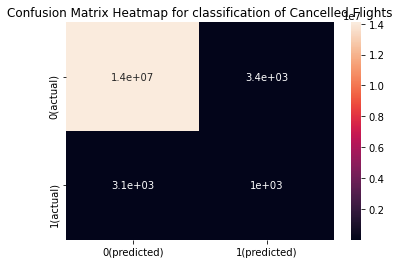

In [201]:
import seaborn as sns

x_axis_labels = ['0(predicted)','1(predicted)'] # labels for x-axis
y_axis_labels = ['0(actual)', '1(actual)']
sns.heatmap(j, xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot=True)
plt.title('Confusion Matrix Heatmap for classification of Cancelled Flights')

In [198]:
from sklearn.metrics import f1_score
f1_score(tree_test,tree_pred)

0.2393404004711425

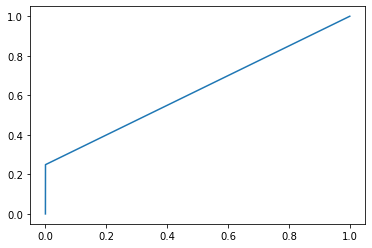

In [197]:
tree_fpr, tree_tpr, tree_threshold = roc_curve(tree_test, tree_pred)
plt.plot(tree_fpr, tree_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(tree_test, tree_pred)))

In [194]:
from sklearn.metrics import roc_auc_score, roc_curve

In [199]:
roc_auc_score(tree_test, tree_pred)


0.6244808969310951

In [49]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [52]:
trainingData

,week_of_year,op_carrier_fl_num,taxi_out,taxi_in,arr_delay,cancelled,crs_elapsed_time,distance,scheduled departure,scheduled arrival,dayofweek,origin_state,dest_state
9750540,28,1007,15,6,0,1,156,965,6,9,2,0,1
9776186,28,2784,15,6,0,1,198,1172,19,21,4,5,3
11072143,32,3818,15,6,0,1,100,335,12,14,5,5,5
8409289,15,5378,15,6,0,1,99,483,13,16,2,0,2
12523764,46,800,15,6,0,1,376,2565,15,18,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2853972,51,2015,19,3,-5,0,100,515,9,11,5,4,4
1339396,50,3945,17,3,-1,0,71,224,14,16,2,2,2
13139633,24,1386,6,3,-20,0,135,904,8,11,3,2,4
615340,45,2029,16,3,18,0,65,240,9,9,4,4,4


In [43]:
#put all flight numbers in col1, 
import random

## Feature Engineering

Feature engineering will play a crucial role in this problems. We have only very little attributes so we need to create some features that will have some predictive power.

- weather: we can use some weather API to look for the weather in time of the scheduled departure and scheduled arrival.
- statistics (avg, mean, median, std, min, max...): we can take a look at previous delays and compute descriptive statistics
- airports encoding: we need to think about what to do with the airports and other categorical variables
- time of the day: the delay probably depends on the airport traffic which varies during the day.
- airport traffic
- unsupervised learning as feature engineering?
- **what are the additional options?**: Think about what we could do more to improve the model.

In [20]:
#going to encode origin 
#going to bin time of day hourly increments, not minute 
#going to bin carriers (i have no idea how)
#bin origins (need to get back into master and re encode it, reload it as a different csv?shit)
#jettison delay type 
#weather is a joke we have at most 2000 requests get lost
######################################################################################################
dirty_scaled['scheduled departure']=pd.to_datetime(dirty_scaled['scheduled departure'], unit='m').dt.hour
dirty_scaled['actual departure']=pd.to_datetime(dirty_scaled['actual departure'], unit='m').dt.hour
dirty_scaled['scheduled arrival']=pd.to_datetime(dirty_scaled['scheduled arrival'], unit='m').dt.hour
dirty_scaled['actual arrival']=pd.to_datetime(dirty_scaled['actual arrival'], unit='m').dt.hour
    



<AxesSubplot:xlabel='scheduled arrival', ylabel='arr_delay'>

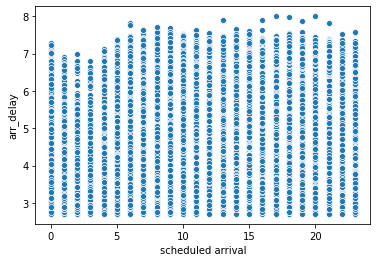

In [37]:
dirty_scaled.head(50)

#still have to determine meaningful times to bin into (will 24 be too many bins)
#just a quick eda on delay times by day to see what bins to make
sns.scatterplot(x='scheduled arrival',y='arr_delay',data=dirty_scaled)


In [38]:
#bin 0-5 5-10 10-15 15-20 20-25

<AxesSubplot:xlabel='scheduled departure', ylabel='dep_delay'>

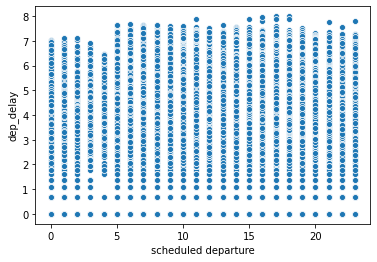

In [39]:
sns.scatterplot(x='scheduled departure',y='dep_delay',data=dirty_scaled)


<AxesSubplot:xlabel='op_unique_carrier', ylabel='arr_delay'>

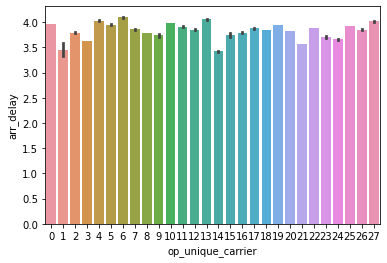

In [40]:
from numpy import median
sns.barplot(x='op_unique_carrier', y='arr_delay', data=dirty_scaled)

In [ ]:
#bin carrier 04561013252627.  12314.   

<AxesSubplot:xlabel='origin', ylabel='arr_delay'>

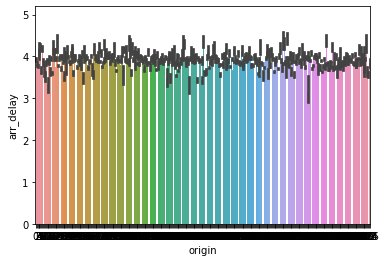

In [41]:
from numpy import median
sns.barplot(x='origin', y='arr_delay', data=dirty_scaled)

## Feature Selection / Dimensionality Reduction

We need to apply different selection techniques to find out which one will be the best for our problems.

- Original Features vs. PCA conponents?

## Modeling

Use different ML techniques to predict each problem.

- linear / logistic / multinomial logistic regression
- Naive Bayes
- Random Forest
- SVM
- XGBoost
- The ensemble of your own choice

## Evaluation

You have data from 2018 and 2019 to develop models. Use different evaluation metrics for each problem and compare the performance of different models.

Final evaluation will be done on data from January 2020 to compare the results from all teams on **out of sample** data. We are required to predict delays on flights from first 7 days of 2020 (1st of January - 7th of January). We can find sample submission in file _sample_submission.csv_